In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
diabetes = pd.read_csv('./SRC/diabetes.tab.txt', sep="	")
diabetes.columns = ['IDADE', 'SEXO', 'IMC', 'PRESSAO_ARTERIAL', 'COLESTEROL_TOTAL', 'LDL', 'HDL','TCH','LTG','ACUCAR_SANGUE','Y']

<AxesSubplot:xlabel='IMC', ylabel='ACUCAR_SANGUE'>

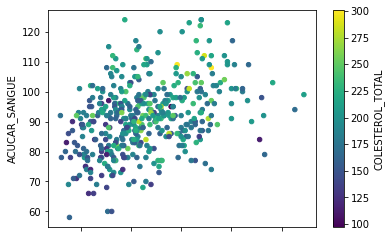

In [3]:

diabetes.plot.scatter(x='IMC', y='ACUCAR_SANGUE',c='COLESTEROL_TOTAL', colormap='viridis')

In [4]:
diabetes_describe = diabetes.describe(percentiles=[])


In [16]:
diabetes_describe

,IDADE,SEXO,IMC,PRESSAO_ARTERIAL,COLESTEROL_TOTAL,LDL,HDL,TCH,LTG,ACUCAR_SANGUE,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [28]:
for i, row in diabetes_describe.iterrows():
    if i == 'mean':
        mean = row
    if i == 'std':
        df = row

it = diabetes.columns
for j in it:
    outliers = df[j] * 3 + mean[j]
    for i, row in diabetes[j].iteritems():
        if row > outliers:
            diabetes_no_outliers = diabetes.drop(i)


In [58]:
diabetes.describe()

,IDADE,SEXO,IMC,PRESSAO_ARTERIAL,COLESTEROL_TOTAL,LDL,HDL,TCH,LTG,ACUCAR_SANGUE,Y
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,48.504651,1.469767,26.289302,94.674372,188.025581,114.847209,49.477907,4.043395,4.634329,91.102326,151.393023
std,13.203578,0.499667,4.281714,13.767554,33.803033,29.473002,11.969857,1.218012,0.519470,11.491712,76.278513
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,85.000000,164.000000,96.050000,41.000000,3.000000,4.266200,83.000000,87.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.605200,91.000000,140.000000
75%,59.000000,2.000000,29.200000,104.917500,208.000000,133.450000,57.000000,5.000000,4.988700,98.000000,207.500000
max,79.000000,2.000000,39.100000,133.000000,286.000000,199.400000,88.000000,7.900000,6.107000,124.000000,341.000000


In [ ]:
diabetes_no_outliers.describe()

In [66]:
titanic = pd.read_csv('./SRC/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
titanic[(titanic['Age']>27) & (titanic['Survived']==1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C


In [67]:

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
